In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
import pandas as pd
from drift_ml.datasets.bosch_cnc_machining.utils.dataloader import TSFreshBoschCNCDataloader

In [10]:
loader = TSFreshBoschCNCDataloader(
    metadata_path="/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/metadata_ws4096.pkl"
)
loader.load_metadata()
loader.load_data("/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/all_features.pkl", 
"/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/sample_data_y_raw_ws4096.npy")

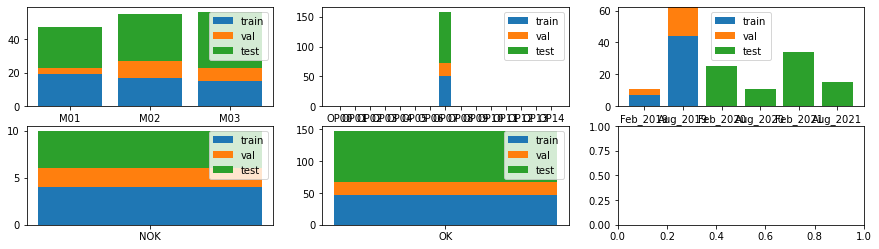

In [72]:
loader.generate_datasets_by_filter(
    processes=["OP07"],
    train_periods=["Feb_2019", "Aug_2019"],
    train_val_split=0.7
    )
loader.plot_stats()

In [73]:
top_n_features = pd.read_pickle("/home/nicolasj92/projects/bosch_cnc_machining/features_and_data/top_30_features_train_3_periods.pkl")

X_train = loader.sample_data_X.iloc[loader.train_sample_ids][top_n_features]
y_train = loader.sample_data_y[loader.train_sample_ids]

X_val = loader.sample_data_X.iloc[loader.val_sample_ids][top_n_features]
y_val = loader.sample_data_y[loader.val_sample_ids]

X_test = loader.sample_data_X.iloc[loader.test_sample_ids][top_n_features]
y_test = loader.sample_data_y[loader.test_sample_ids]

### Train and test a classification model

In [74]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [76]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

print("Training Set")
print(classification_report(y_train, y_pred_train, target_names=["OK", "NOK"]))
print("Validation Set")
print(classification_report(y_val, y_pred_val, target_names=["OK", "NOK"]))
print("Test Set")
print(classification_report(y_test, y_pred_test, target_names=["OK", "NOK"]))

Training Set
              precision    recall  f1-score   support

          OK       1.00      1.00      1.00       558
         NOK       1.00      1.00      1.00        31

    accuracy                           1.00       589
   macro avg       1.00      1.00      1.00       589
weighted avg       1.00      1.00      1.00       589

Validation Set
              precision    recall  f1-score   support

          OK       1.00      1.00      1.00       235
         NOK       1.00      1.00      1.00        18

    accuracy                           1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253

Test Set
              precision    recall  f1-score   support

          OK       0.99      0.99      0.99       964
         NOK       0.74      0.76      0.75        38

    accuracy                           0.98      1002
   macro avg       0.87      0.88      0.87      1002
weighted avg       0.98      0.98    